# Process the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

df = pd.read_csv('kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [2]:
# 21,597 entires with null values in the waterfront, view, and yr_renovated columns.

In [3]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


---

# Exploratory Data Analysis

In [4]:
# Remove rows from the sqft_basement column with a '?' entry (this removes 454 rows)
df = df[df.sqft_basement != '?']

# Convert the sqft_basement column to an int data type, need to convert to float first
df.sqft_basement = df.sqft_basement.astype(float).astype(int)

# Drop rows in the waterfront column with NAN entries
df.dropna(subset = ['waterfront'], inplace = True)

In [5]:
# Create a dataframe for variables used for the model

# Drop irrelevant columns
# id
# date
# view
# lat/long
# sqft_living15/sqft_lot15'
df.drop(columns=['id', 'date', 'view', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], inplace = True)

# Create a living_density column that compares the living area to the lot area
df['density'] = df.sqft_living / df.sqft_lot

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,density
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400,1951,1991.0,98125,0.354874
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0,1933,NaN,98028,0.077000
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910,1965,0.0,98136,0.392000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0,1987,0.0,98074,0.207921
5,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530,2001,0.0,98053,0.053174


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18804 entries, 1 to 21596
Data columns (total 15 columns):
price            18804 non-null float64
bedrooms         18804 non-null int64
bathrooms        18804 non-null float64
sqft_living      18804 non-null int64
sqft_lot         18804 non-null int64
floors           18804 non-null float64
waterfront       18804 non-null float64
condition        18804 non-null int64
grade            18804 non-null int64
sqft_above       18804 non-null int64
sqft_basement    18804 non-null int64
yr_built         18804 non-null int64
yr_renovated     15474 non-null float64
zipcode          18804 non-null int64
density          18804 non-null float64
dtypes: float64(6), int64(9)
memory usage: 2.3 MB


In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,density
count,1.880400e+04,18804.000000,18804.000000,18804.000000,1.880400e+04,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,15474.000000,18804.000000,18804.000000
mean,5.418399e+05,3.374388,2.117541,2083.155499,1.509805e+04,1.494522,0.007552,3.410019,7.661615,1791.997713,291.157786,1971.068868,81.657684,98077.631780,0.323421
std,3.730331e+05,0.927297,0.769623,923.070881,4.102504e+04,0.539777,0.086573,0.650183,1.177350,832.378323,442.758076,29.320879,395.416206,53.481088,0.269304
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,0.000610
25%,3.215000e+05,3.000000,1.750000,1430.000000,5.048000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98032.000000,0.156290
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.629500e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,0.247225
75%,6.436125e+05,4.000000,2.500000,2550.000000,1.072075e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98117.000000,0.405794
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,4.653846


### Checking for Outliers

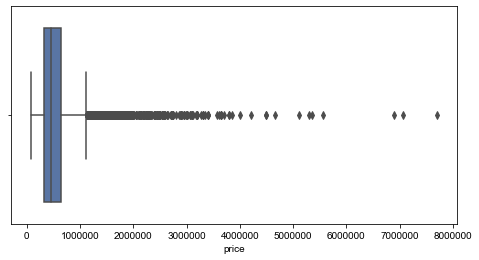

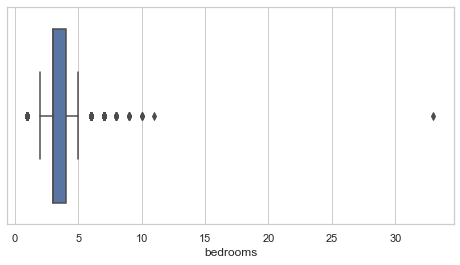

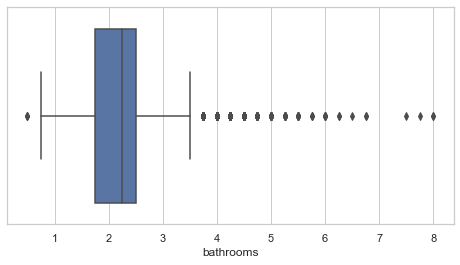

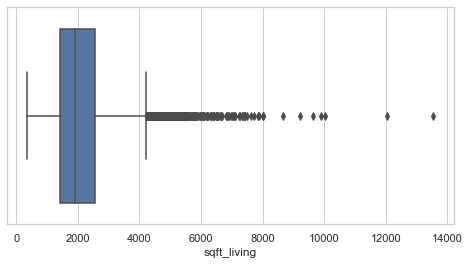

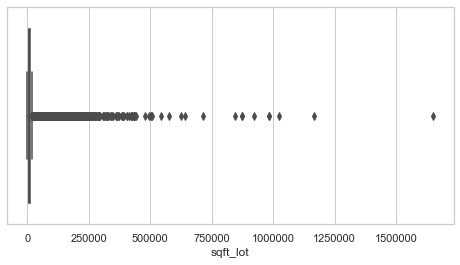

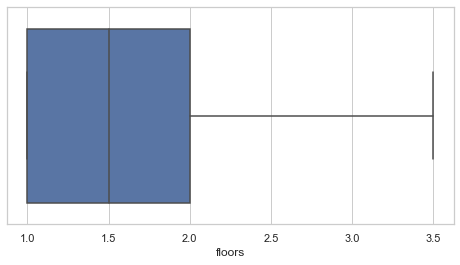

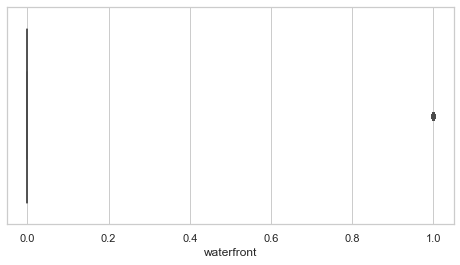

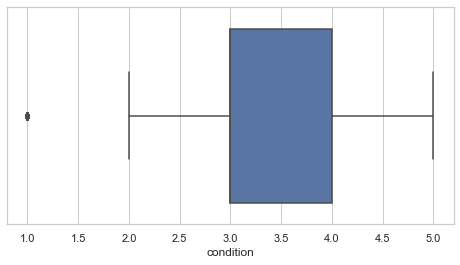

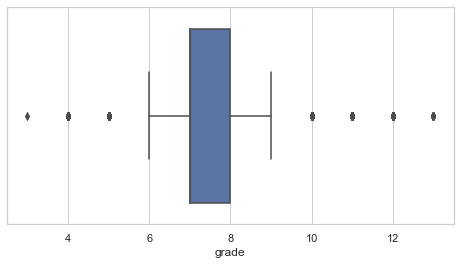

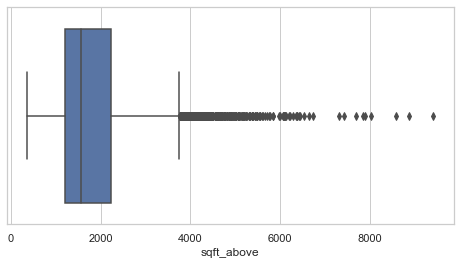

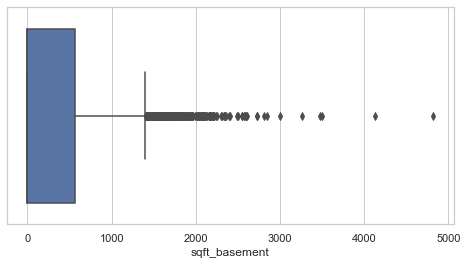

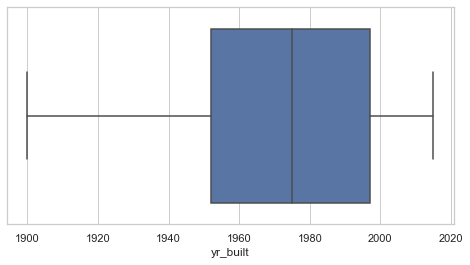

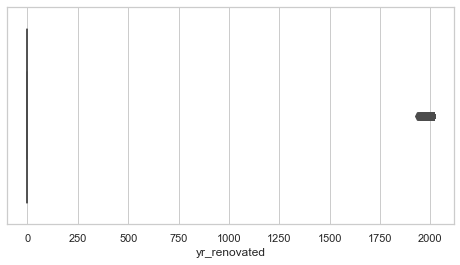

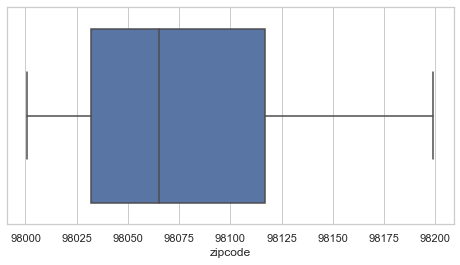

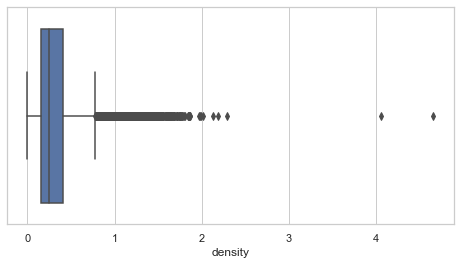

In [8]:
columns = df.columns

for column in columns:
    fig, ax = plt.subplots(figsize=(8,4))
    sns.set(style='whitegrid')
    sns.boxplot(df[column])

#### Bedrooms has an outlier. We decided to eliminate it. 

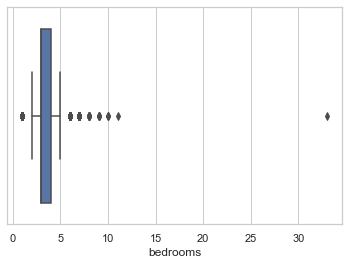

In [9]:
sns.set(style='whitegrid')
sns.boxplot(df['bedrooms'])

In [10]:
#locating the row of the bedroom outlier
df.loc[df['bedrooms']>30]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,density
15856,640000.0,33,1.75,1620,6000,1.0,0.0,5,7,1040,580,1947,0.0,98103,0.27


In [11]:
#dropping the row of the bedroom outlier
df.drop(index = 15856, inplace=True)

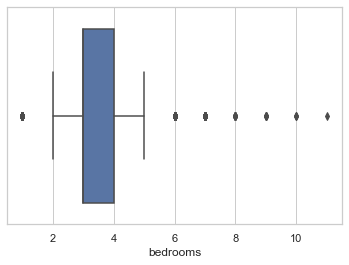

In [12]:
#replotting a box plot
sns.set(style='whitegrid')
sns.boxplot(df['bedrooms'])

#### sqft_lot has an outlier. We decided to keep this row. 

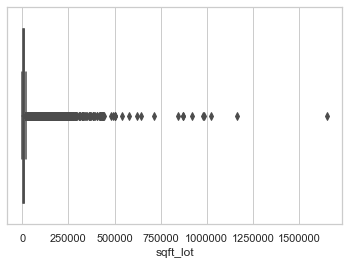

In [13]:
sns.boxplot(df['sqft_lot']);

In [14]:
max(df['sqft_lot'])

1651359

In [15]:
df.loc[df['sqft_lot']>1000000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,density
1717,700000.0,4,1.0,1300,1651359,1.0,0.0,4,6,1300,0,1920,0.0,98022,0.000787
7762,855000.0,4,3.5,4030,1024068,2.0,0.0,3,10,4030,0,2006,0.0,98045,0.003935
17305,190000.0,2,1.0,710,1164794,1.0,0.0,2,5,710,0,1915,0.0,98014,0.000610


##### Checking latitude and longitude of largest lot

In [16]:
df.loc[df['sqft_lot']>1500000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,density
1717,700000.0,4,1.0,1300,1651359,1.0,0.0,4,6,1300,0,1920,0.0,98022,0.000787


Checked on google maps. This is a farm with a farm house. The latitude, longitude, and sf lot (equivalent to 37 acres) are accurate. Decided to keep in. 

---

## Determine Colinearity

Conclusion: sqft_above and sqft_living are colinear. Remove sqft_above.

In [17]:
#correlation matrix
df_ind = df.drop(columns = 'price')
df_corr = df_ind.corr()
df_corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,density
bedrooms,1.000000,0.530981,0.594891,0.030583,0.190085,0.000041,0.020626,0.371227,0.495239,0.309213,0.164936,0.019164,-0.155948,0.031102
bathrooms,0.530981,1.000000,0.755768,0.085007,0.508007,0.068291,-0.127895,0.667539,0.687759,0.282684,0.508486,0.047146,-0.202068,0.287252
sqft_living,0.594891,0.755768,1.000000,0.172985,0.358311,0.111725,-0.059165,0.764472,0.877784,0.434627,0.319131,0.048497,-0.195899,0.077913
sqft_lot,0.030583,0.085007,0.172985,1.000000,-0.007084,0.022578,-0.015600,0.114884,0.184247,0.014267,0.056265,0.000684,-0.128978,-0.253440
floors,0.190085,0.508007,0.358311,-0.007084,1.000000,0.021367,-0.263115,0.459016,0.526079,-0.241992,0.490876,-0.000806,-0.058481,0.553736
waterfront,0.000041,0.068291,0.111725,0.022578,0.021367,1.000000,0.017755,0.088204,0.075918,0.090204,-0.025435,0.083269,0.030284,-0.030302
condition,0.020626,-0.127895,-0.059165,-0.015600,-0.263115,0.017755,1.000000,-0.145784,-0.155957,0.169845,-0.362090,-0.061590,0.001551,-0.156569
grade,0.371227,0.667539,0.764472,0.114884,0.459016,0.088204,-0.145784,1.000000,0.757899,0.168971,0.446756,0.012457,-0.183935,0.189702
sqft_above,0.495239,0.687759,0.877784,0.184247,0.526079,0.075918,-0.155957,0.757899,1.000000,-0.049935,0.423168,0.017776,-0.257858,0.051466
sqft_basement,0.309213,0.282684,0.434627,0.014267,-0.241992,0.090204,0.169845,0.168971,-0.049935,1.000000,-0.130208,0.067333,0.076348,0.065681


- correlations take a value between -1 and 1, -1 being a perfectly negative linear relationship, and +1 a perfectly positive linear relationship.

In [18]:
df_corr = df_corr.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

df_corr.set_index(['pairs'], inplace=True)

df_corr.drop(columns=['level_1', 'level_0'], inplace=True)

df_corr.columns = ['cc']

df_corr.drop_duplicates(inplace=True)

df_corr

,cc
pairs,
"(bedrooms, bedrooms)",1.000000
"(grade, sqft_above)",0.945977
"(sqft_living, sqft_above)",0.924974
"(sqft_living, grade)",0.919823
"(grade, bathrooms)",0.919236
...,...
"(waterfront, condition)",0.026929
"(sqft_living, density)",0.020489
"(zipcode, waterfront)",0.018028


In [19]:
#this would be high correlation
df_corr[(df_corr.cc>.75) & (df_corr.cc<1)]

,cc
pairs,
"(grade, sqft_above)",0.945977
"(sqft_living, sqft_above)",0.924974
"(sqft_living, grade)",0.919823
"(grade, bathrooms)",0.919236
"(sqft_living, bathrooms)",0.912745
"(bathrooms, sqft_above)",0.902962
"(bedrooms, sqft_living)",0.820150
"(floors, yr_built)",0.806781
"(yr_built, bathrooms)",0.776215


In [20]:
#### We choce to remove sqft_above and yr_built due to being highly correlated but chose to keep the others based on intuition.

In [21]:
df.drop(columns = ['sqft_above', 'yr_built'], inplace = True)

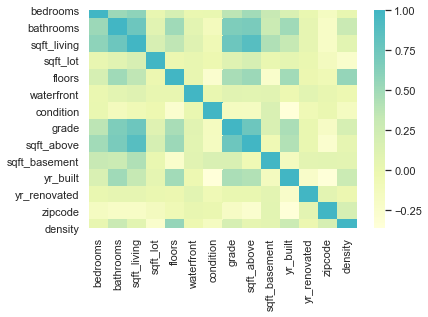

In [22]:
# look at setting color to 4 colors only

sns.heatmap(df_ind.corr(), center=1, cmap='YlGnBu');

The heatmap confirms that sqft_living, sqft_above, and bathrooms are correlated. So we should remove 2 of 3 variables.

### Use Dummy Variables for Categorical Variables

#### Identifying Categorical Variables

How many categories of bedroom or bathroom do you have?\
How many numeric values do you have?\
How do you interpret it?\
With every one additional bathroom, you might expect the house price to increase by _____.\
Does this approach make sense for other variables?

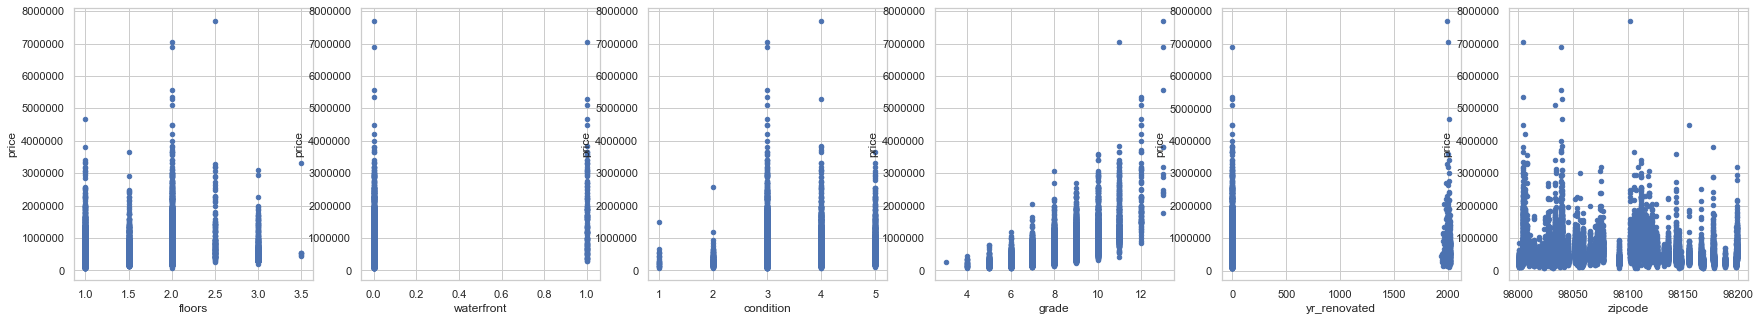

In [23]:
# visualize categorical variables with scatter plots
categorical = df[['floors', 'waterfront', 'condition', 'grade', 'yr_renovated', 'zipcode', 'price']]

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(30,5))

for xcol, ax in zip(['floors', 'waterfront', 'condition', 'grade', 'yr_renovated', 'zipcode'], axes):
    categorical.plot(kind='scatter', x=xcol, y='price', ax=ax, color='b')

In [24]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_renovated,zipcode,density
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400,1991.0,98125,0.354874
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0,NaN,98028,0.077000
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910,0.0,98136,0.392000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0,0.0,98074,0.207921
5,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,1530,0.0,98053,0.053174


In [25]:
# Create new columns to simplify categorical variables

# condition: >= 3 is 'Good', < 3 is 'Poor'
df['condition_cat'] = np.where(df.condition >= 3, 'Good', 'Poor')

# grade: under 6 = mostly flat, 6-9 = low slope, 9-12 = hilly, 12+ = steep
df['grade_cat'] = np.where(df.grade >= 12, 'Steep', (np.where((df.grade < 12) & (df.grade >= 9), 
                    'Hilly', (np.where((df.grade < 9) & (df.grade >=6), 'Low_Slope', 'Flat')))))

# yr_renovated: 0 is 'Not Renovated', < 2000 is 'Prior to 2000', >= 2000 is '2000 to Present'
df['renovated_cat'] = np.where(df.yr_renovated >= 2000, 'Recently_Renovated', (np.where((df.yr_renovated < 2000) 
                    & (df.yr_renovated > 0), 'Prior_to_2000', 'Not_Renovated')))

# The zipcodes for "urban" are the zip codes found in Seattle, WA
urban = [98177, 98117, 98107, 98199, 98119, 98109, 98103, 98133, 98125, 98155, 98115,
         98105, 98112, 98102, 98122, 98144, 98108, 98118, 98116, 98121, 98101, 98154, 
         98104, 98134, 98106, 98126, 98136, 98146, 98168, 98178]

df['zipcode_cat'] = ['urban' if x in urban else 'rural' for x in df['zipcode']]

# density binning
df['density_cat'] = np.where(df.density >= 3, 'high_density',
                             (np.where((df.density < 3) & (df.density >= 1),
                                       'mid_density', 'low_density')))

# bedrooms binning
df['bed_cat'] = np.where(df.bedrooms >= 4, 'beds_4+', 
                            (np.where((df.bedrooms >= 3) & (df.bedrooms < 4), 'beds_3',
                         (np.where((df.bedrooms >= 2) & (df.bedrooms < 3), 'beds_2', 'beds_1')))))

In [26]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_renovated,zipcode,density,condition_cat,grade_cat,renovated_cat,zipcode_cat,density_cat,bed_cat
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400,1991.0,98125,0.354874,Good,Low_Slope,Prior_to_2000,urban,low_density,beds_3
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0,NaN,98028,0.077000,Good,Low_Slope,Not_Renovated,rural,low_density,beds_2
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910,0.0,98136,0.392000,Good,Low_Slope,Not_Renovated,urban,low_density,beds_4+
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0,0.0,98074,0.207921,Good,Low_Slope,Not_Renovated,rural,low_density,beds_3
5,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,1530,0.0,98053,0.053174,Good,Hilly,Not_Renovated,rural,low_density,beds_4+


## Prepare the data for the Regression Model

In [27]:
df_num = df.drop("price", axis=1) # drop labels for training set
y = df["price"].copy()

In [28]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median");

In [29]:
#df_num = df_num.drop(columns = ['floors', 'waterfront', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'grade_cat', 'renovated_cat', 'zipcode_cat'], axis=1)
df_num = df_num.drop(columns = ['bedrooms', 'condition', 'grade', 'yr_renovated', 'zipcode', 
                                'condition_cat', 'grade_cat', 'renovated_cat', 'zipcode_cat', 'density_cat', 'bed_cat'], axis=1)

In [30]:
imputer.fit(df_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [31]:
X = imputer.transform(df_num)

In [32]:
condition_cat = df[['condition_cat']]
grade_cat = df[['grade_cat']]
renovated_cat = df[['renovated_cat']]
zipcode_cat = df[['zipcode_cat']]
density_cat = df[['density_cat']]
bed_cat = df[['bed_cat']]

In [33]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20
    
cat_encoder = OneHotEncoder()

In [34]:
condition_cat_1hot = cat_encoder.fit_transform(condition_cat)
condition_cats = cat_encoder.categories_[0].tolist()

grade_cat_1hot = cat_encoder.fit_transform(grade_cat)
grade_cats = cat_encoder.categories_[0].tolist()

renovated_cat_1hot = cat_encoder.fit_transform(renovated_cat)
renovated_cats = cat_encoder.categories_[0].tolist()

zipcode_cat_1hot = cat_encoder.fit_transform(zipcode_cat)
zipcode_cats = cat_encoder.categories_[0].tolist()

density_cat_1hot = cat_encoder.fit_transform(density_cat)
density_cats = cat_encoder.categories_[0].tolist()

bed_cat_1hot = cat_encoder.fit_transform(bed_cat)
bed_cats = cat_encoder.categories_[0].tolist()

In [35]:
X = np.c_[(X, condition_cat_1hot.toarray(), grade_cat_1hot.toarray(), renovated_cat_1hot.toarray(), zipcode_cat_1hot.toarray(), density_cat_1hot.toarray(), bed_cat_1hot.toarray())]

In [36]:
cols = df_num.columns.tolist() + condition_cats + grade_cats + renovated_cats + zipcode_cats + density_cats + bed_cats
df_price = df[['price']].copy()
df = pd.DataFrame(X, columns = cols, index = df.index)
df = pd.concat([df_price, df], axis=1)
df.head()

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_basement,density,Good,Poor,...,Recently_Renovated,rural,urban,high_density,low_density,mid_density,beds_1,beds_2,beds_3,beds_4+
1,538000.0,2.25,2570.0,7242.0,2.0,0.0,400.0,0.354874,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,180000.0,1.00,770.0,10000.0,1.0,0.0,0.0,0.077000,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,604000.0,3.00,1960.0,5000.0,1.0,0.0,910.0,0.392000,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,510000.0,2.00,1680.0,8080.0,1.0,0.0,0.0,0.207921,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,1230000.0,4.50,5420.0,101930.0,1.0,0.0,1530.0,0.053174,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


---

## Create models and determine which is best

### Cross Validation

In [37]:
from sklearn.model_selection import train_test_split

X_options = X.copy()
X_options = X_options[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=12)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [38]:
#standardization function will get applied to both df_tr and df_tr_price
def standardize(element, sigma):
    """Changes the mean and standard error"""
    std_element = (element - np.mean(element)) / sigma
    return std_element

In [39]:
# finding std deviation of one column as a test
sigma_bathrooms = df_train['bathrooms'].std()
sigma_sqft_living = df_train['sqft_living'].std()
sigma_sqft_lot = df_train['sqft_lot'].std()
sigma_floors = df_train['floors'].std()
sigma_sqft_basement = df_train['sqft_basement'].std()

In [40]:
# making a list of the standard deviations of each column
sigmas = [df_train[col].std() for col in df_train]
sigmas

[374798.8749591529,
 0.768533068309458,
 923.8658901689922,
 37632.780592424984,
 0.5405579646162327,
 0.09005985945836892,
 443.5058710499704,
 0.27079406717689686,
 0.0953454156473431,
 0.0953454156473431,
 0.11021996735989986,
 0.39273469093103397,
 0.40575939686252493,
 0.0704379751866444,
 0.17961512879106822,
 0.12632964533013036,
 0.12984184622839456,
 0.4858596564449966,
 0.4858596564449966,
 0.01153049012433855,
 0.1903011246958784,
 0.1899777283609751,
 0.09291757890387077,
 0.3316885821392795,
 0.4981168042411664,
 0.49166341808931907]

In [41]:
# NEED HELP

# Standardizing All Columns at once
# Loop through the dataframe, one column at a time, taking the floats from the sigmas list one at a time

#for (col, data) in df_train.iteritems():
#    col.apply(lambda x: standardize(col, i for i in sigmas))

In [42]:
# Standardizing one Column at a time, as a test
# when the for loop works, the values should match those under bedrooms column below.
df_train['bathrooms'] = standardize(df_train['bathrooms'], sigma_bathrooms)
df_train['sqft_living'] = standardize(df_train['sqft_living'], sigma_sqft_living)
df_train['sqft_lot'] = standardize(df_train['sqft_lot'], sigma_sqft_lot)
df_train['floors'] = standardize(df_train['floors'], sigma_floors)
df_train['sqft_basement'] = standardize(df_train['sqft_basement'], sigma_sqft_basement)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [43]:
df_train.head(3)

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_basement,density,Good,Poor,...,Recently_Renovated,rural,urban,high_density,low_density,mid_density,beds_1,beds_2,beds_3,beds_4+
2369,482000.0,-0.475875,0.561993,2.409744,-0.912118,0.0,2.272449,0.024624,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
14760,1610000.0,0.825305,3.668504,0.087647,0.937822,1.0,3.264544,0.300549,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
13976,410000.0,-0.801170,-0.975027,-0.368498,0.937822,0.0,-0.523455,1.141199,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [45]:
#verifying the number of observations in each group
print(len(X_train), len(X_test), len(y_train), len(y_test))

15042 3761 15042 3761


In [46]:
# Creating the model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression() #instantiate
linreg.fit(X_train, y_train)

y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

In [47]:
r_sq = linreg.score(X_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', linreg.intercept_)
print('slope:', linreg.coef_)

coefficient of determination: 0.6428935579834624
intercept: 455692.8643412258
slope: [-2.63698015e-07  1.76725438e+04  2.45544249e+02 -2.63290881e-01
 -4.15890349e+04  8.13931697e+05 -1.94521736e+01  2.63611110e+04
  1.83340935e+04 -1.83340935e+04 -3.19874969e+05 -1.24976306e+05
 -3.13673272e+05  7.58524547e+05 -7.36063588e+04 -5.73889058e+03
  7.93452494e+04 -7.25786007e+04  7.25786007e+04  7.05750098e+04
 -4.10488960e+04 -2.95261138e+04  3.54458632e+04  3.07541056e+04
 -9.87174170e+03 -5.63282271e+04]


In [48]:
# getting residuals
train_residuals = y_pred_train - y_train
test_residuals = y_pred_test - y_test

In [49]:
# Determine MSE
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 50160905623.326866
Test Mean Squared Error: 52124106924.614296


In [50]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

regression_results(y_train, y_pred_train)

explained_variance:  0.6429
mean_squared_log_error:  0.1241
r2:  0.6429
MAE:  147434.5804
MSE:  50160905623.3269
RMSE:  223966.3047


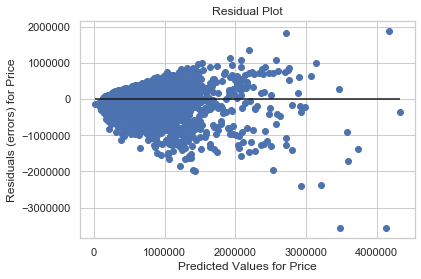

In [51]:
plt.scatter(y_pred_train, train_residuals)
plt.hlines(y = 0, xmin = y_pred_train.min(), xmax = y_pred_train.max())
plt.title('Residual Plot')
plt.xlabel('Predicted Values for Price')
plt.ylabel('Residuals (errors) for Price')
plt.show()

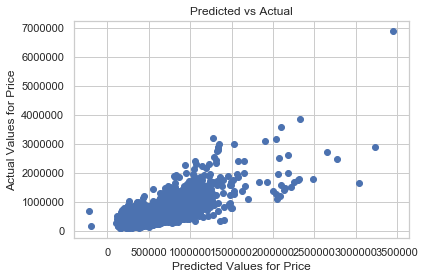

In [52]:
plt.scatter(y_pred_test, y_test)
# plt.hlines(y = 0, xmin = y_pred_test.min(), xmax = y_pred_test.max())
plt.title('Predicted vs Actual')
plt.xlabel('Predicted Values for Price')
plt.ylabel('Actual Values for Price')
plt.show()

In [53]:
const = list(['intercept'])
cols = const + cols
cols

['intercept',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'sqft_basement',
 'density',
 'Good',
 'Poor',
 'Flat',
 'Hilly',
 'Low_Slope',
 'Steep',
 'Not_Renovated',
 'Prior_to_2000',
 'Recently_Renovated',
 'rural',
 'urban',
 'high_density',
 'low_density',
 'mid_density',
 'beds_1',
 'beds_2',
 'beds_3',
 'beds_4+']

In [54]:
model = sm.OLS(y_train, X_train)
model.exog_names[:] = cols
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     1423.
Date:                Thu, 09 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:01:11   Log-Likelihood:            -2.0665e+05
No. Observations:               15042   AIC:                         4.133e+05
Df Residuals:                   15022   BIC:                         4.135e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept           1.439e+05   1.85e+04      7.769      0.000    1.08e+05     1.8e+05
bathrooms           1.767e+04   4168.694      4.239      0.000    9501.396    2.58e+04
sqft_living          245.5442      4.490     54.692      0.000     236.744     254.344
sqft_lot              -0.2633      0.054     -4.903      0.000      -0.369      -0.158
floors             -4.159e+04   5740.525     -7.245      0.000   -5.28e+04   -3.03e+04
waterfront          8.139e+05   2.07e+04     39.234      0.000    7.73e+05    8.55e+05
sqft_basement        -19.4522      6.054     -3.213      0.001     -31.319      -7.585
density             2.636e+04    1.3e+04      2.035      0.042     968.916    5.18e+04
Good                9.029e+04   1.24e+04      7.272      0.000    6.59e+04    1.15e+05
Poor                5.362e+04   1.43e+04      3.746      0.000    2.56e+04    8.17e+04
Flat               -2.839e+05   1.58e+04    -17.963      0.000   -3.15e+05   -2.53e+05
Hilly                -8.9e+04   9392.076     -9.476      0.000   -1.07e+05   -7.06e+04
Low_Slope          -2.777e+05   9401.740    -29.537      0.000   -2.96e+05   -2.59e+05
Steep               7.945e+05   2.29e+04     34.742      0.000     7.5e+05    8.39e+05
Not_Renovated      -2.564e+04   8667.990     -2.958      0.003   -4.26e+04   -8648.372
Prior_to_2000       4.223e+04   1.26e+04      3.360      0.001    1.76e+04    6.69e+04
Recently_Renovated  1.273e+05   1.24e+04     10.259      0.000    1.03e+05    1.52e+05
rural               -627.0958   9412.121     -0.067      0.947   -1.91e+04    1.78e+04
urban               1.445e+05   9651.760     14.974      0.000    1.26e+05    1.63e+05
high_density        1.185e+05   1.16e+05      1.024      0.306   -1.08e+05    3.46e+05
low_density         6918.7740   5.06e+04      0.137      0.891   -9.23e+04    1.06e+05
mid_density         1.844e+04   4.87e+04      0.379      0.705    -7.7e+04    1.14e+05
beds_1              7.142e+04   1.61e+04      4.423      0.000    3.98e+04    1.03e+05
beds_2              6.673e+04   7718.931      8.645      0.000    5.16e+04    8.19e+04
beds_3               2.61e+04   7193.404      3.629      0.000     1.2e+04    4.02e+04
beds_4+            -2.035e+04   7846.356     -2.594      0.009   -3.57e+04   -4972.660
==============================================================================
Omnibus:                     8219.380   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           238496.788
Skew:                           2.074   Prob(JB):                         0.00
Kurtosis:                      22.061   Cond. No.                     5.67e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is corr

In [55]:
model.params

intercept             143903.009792
bathrooms              17672.543841
sqft_living              245.544249
sqft_lot                  -0.263291
floors                -41589.034915
waterfront            813931.696715
sqft_basement            -19.452174
density                26361.110988
Good                   90285.598435
Poor                   53617.411357
Flat                 -283899.216665
Hilly                 -89000.553114
Low_Slope            -277697.519767
Steep                 794500.299338
Not_Renovated         -25638.688851
Prior_to_2000          42228.779350
Recently_Renovated    127312.919293
rural                   -627.095760
urban                 144530.105552
high_density          118542.679712
low_density             6918.773980
mid_density            18441.556100
beds_1                 71421.615613
beds_2                 66729.858095
beds_3                 26104.010750
beds_4+               -20352.474666
dtype: float64

In [ ]:
# Standardizing one Column at a time, as a test
# when the for loop works, the values should match those under bedrooms column below.
df_train['bathrooms'] = standardize(df_train['bathrooms'], sigma_bathrooms)
df_train['sqft_living'] = standardize(df_train['sqft_living'], sigma_sqft_living)
df_train['sqft_lot'] = standardize(df_train['sqft_lot'], sigma_sqft_lot)
df_train['floors'] = standardize(df_train['floors'], sigma_floors)
df_train['sqft_basement'] = standardize(df_train['sqft_basement'], sigma_sqft_basement)

In [66]:
# inverse transformation for coefficients

# this was the original transformation:
# std_element = (element - np.mean(element)) / sigma

# the reverse transformation is like this:
# std_element * sigma + np.mean(element)

train_params = list(model.params)
train_inverse = pd.DataFrame(cols, train_params)
train_inverse

,0
143903.009792,intercept
17672.543841,bathrooms
245.544249,sqft_living
-0.263291,sqft_lot
-41589.034915,floors
813931.696715,waterfront
-19.452174,sqft_basement
26361.110988,density
90285.598435,Good
53617.411357,Poor
